<a href="https://colab.research.google.com/github/chldydgh4687/Kaggle/blob/master/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Link
[House Prices:Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

# Description
- we need to this course before trying a featured competition.
- this course require R or Python machine Learning basic skills.
### Competition context
- normal people want to buy the height of the basement ceiling or the proximity to an east-wet railroad(an expensive house).
- white picket fence : surburban(middle-class) life
- this dataset prove that much more influences price negotiations than middle-class life
- in Ames us city, with 79 explanatory variables describing every aspect of residential homes(ex. )  

- purpose : predict the final price of each home.

### Require Skills

- Creative feautre engineering
- advanced regression techniques like random forest and gradient boosting.


### GOAL

- predict sales price for each house.
- predict the value of the SalePrice variable. for each ID in the test.

### Evaluated Function 

- this evaluated function use root-mean-squared-error between predicted value and observed sales price.  
(so, this evaluated function give penalty to cheap house )


### Submission File Format

- in final csv file, we must insert predict value "SalePrice"

Id, SalePrice  
1461, 169000.1  
...  


In [0]:
!ls -lha kaggle.json
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/,kaggle/kaggle.json

! kaggle -v

-rw-r--r-- 1 root root 66 Nov 17 09:10 kaggle.json
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
     |████████████████████████████████| 61kB 2.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=f2757c3bb033478e21618a15c9e61804fabde802f8a5c44f5498c9c54a4140fe
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
chmod: cannot access '/root/,kaggle/kaggle.json': No such file or directory
Kaggle API 1.5.6


In [0]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/191k [00:00<?, ?B/s]
100% 191k/191k [00:00<00:00, 82.6MB/s]


In [0]:
import zipfile
import os

os.mkdir("/content/input")

zip_ref = zipfile.ZipFile("/content/house-prices-advanced-regression-techniques.zip",'r')
zip_ref.extractall("/content/input")
zip_ref.close()

# EDA

## import libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats
import warnings

%matplotlib inline

plt.style.use('ggplot')

## read_data

In [0]:
train = pd.read_csv("../content/input/train.csv")
train.shape

(1460, 81)

In [0]:
test = pd.read_csv("../content/input/test.csv")
test.shape

(1459, 80)

## train dataset glimpse

In [0]:
list_t = list()
list_t = [train.columns]
print(list_t)

[Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDriv

### Understanding columns ... 81?;; Is it real? 
###  Read the data_description.txt

In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# [NUll 데이터 살펴보기](https://www.craft.ai/blog/missing-values)

### 2ML2010 DATASET을 통하여 NULL처리에 대해 알아보자.

이 데이터셋은 습도와 온도의 관계에서 NULL 값을 생산해낸다.   
MNAR - Missing Not At Random : 특정한 임계값에 의해 온도의 값이 임계값이상은 null이 떨어진다.

MAR - Missing At Random : 특정 습도에 해당하는 부분에서 null값이 만들어짐.

MCAR - Missing Completely at Random : 다른 값에 의해 랜덤하게 떨어지는 경우 

메소드를 통해서 MNAR, MAR에 비해 구분이된다. 하지만 MNAR, MAR은 다른 변수에 의존하지 않기에 구분짓기가 모호하다.

 MISSING VALUES 가장 자주 먼저 하는 대응책은 해당하는 변수를 없앤다. 하지만 이는 정확도에 큰 영향을 주고 전체 퍼포먼스의 질을 떨어트릴 수 있다. 그리하여, 이를 평균값 OR 중간값으로 (MEAN MEDIAN) 채워주거나 K 이웃을 통해 NULL값을 채워준다. K 이웃은 MCAR 의 경우 더 좋은 결과를 낼 수 있다. 알고리즘은 이외에도 linear regression, logistic regression, neural networks such as multi layer perceptron, or support vector machine 등이 있으나 이에 반에 트리는 missing data에 더 적합하다. 바닐라 DT, RandomForests, 심지어 XGBoost 있다.

clustering methods(ex. kmeans, fuzzy kmeans or expectation maximization algorithm 과 (knn)) 는 missing 데이터를 채우기위해 사용될 수 있다.

null만의 트리로 일정한 값을 주는 트리 방식은 mnar경우에 효율적이며, 원하는 답과 missing data를 나누는 것이 싫다면 분배도 할 수 있다. 이는 mcar에 적합하다.


In [0]:
nulllist = list()
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

train[null_columns].dtypes



LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [0]:
categoryVariableList = ["Alley", "MasVnrType", 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType','GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']
for var in categoryVariableList:
  train[var] = train[var].astype("category")

In [0]:
nulllist = null_columns

print(nulllist)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


### 위의 지식에 대한 나의 판단 :
- 해당 데이터에는 null값이 많음
- NULL 값에 민감하지 않은 결정 트리를 이용하며, NULL값이 많은 변수는 아닌 변수를 통해 예측을 한다.
- heatmap을 그려 SalesPrice 가장 관련된 변수를, 각각이 관련된 변수를 찾는다.

(37.9, -0.1)

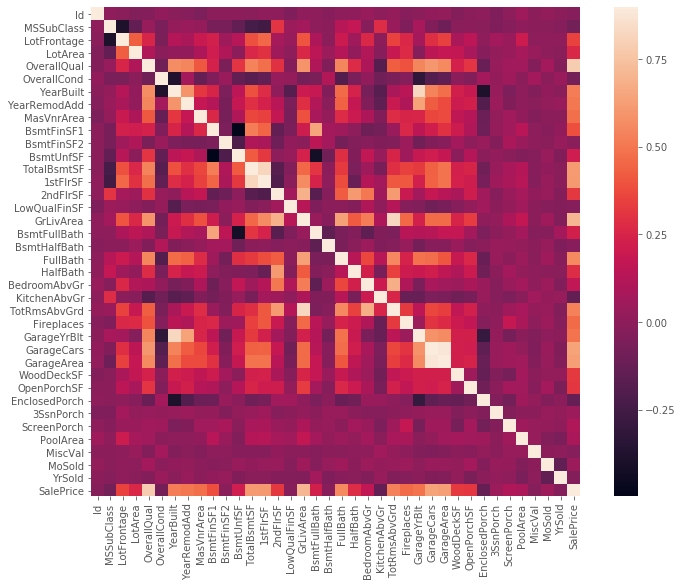

In [0]:
matt = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,9)

sns.heatmap(matt, vmax=.9,square=True,
            xticklabels=True, yticklabels=True)
##heatmap 짤림방지 코드
ax.set_ylim(len(matt)-0.1,-0.1)

![house_correlation](https://raw.githubusercontent.com/chldydgh4687/MY_AI/master/ML/picture/house_correlation.png)

In [0]:
Matt = train[["LotFrontage", "Alley", "MasVnrType", "MasVnrArea", 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature','SalePrice']]
Matt = Matt.corr()
mask = np.array(Matt)
mask[np.tril_indices_from(mask)] = False

(3.9, -0.1)

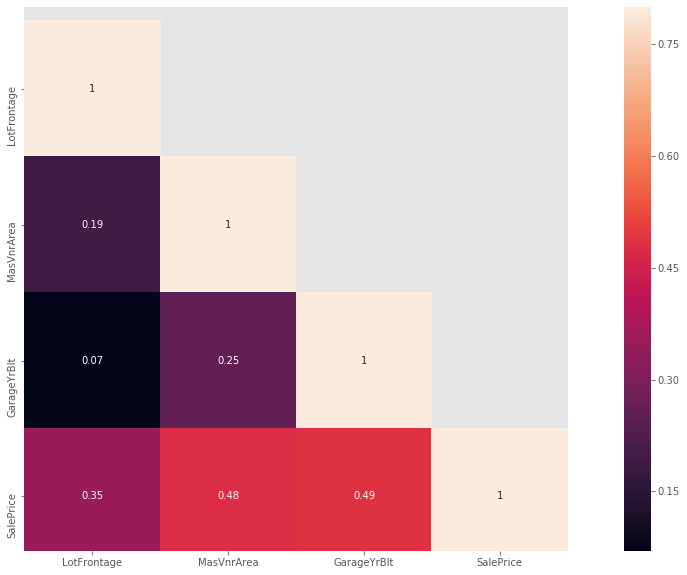

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(Matt, mask=mask,vmax=.8,square=True,annot=True)
## heatmap 짤림방지 코드
ax.set_ylim(len(Matt)-0.1, -0.1)



---



# SalePrice 상관관계
### high  
- MSSubClass, OverallCond, BsmtfinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, BsmtUnfSF  

### middle
- LotFrontage, LottArea, BsmtFinSF1, 2ndFlrSF, BsmtFullBath, HalfBBath, BedroomAbvGr, WoodDeckSF, OpenPorchSF  

### low  
- OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea

In [0]:
# Matt = train[["LotFrontage", "Alley", "MasVnrType", "MasVnrArea", 'BsmtQual',
#        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
#        'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
#        'MiscFeature','SalePrice']]

## 1.msno.null과 비교하여 low 컬럼은 드랍.
## 2.middle, high 는 예측하여 값을 생성. 
## 3.rmsle 트리를 이용한 price 예측

#1. 

In [0]:
train = train.drop(['GarageYrBlt'], axis=1)